In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importando o Dataset do titanic

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 1. EDA 

In [3]:
# contagem de nulos
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
df.dropna(inplace=True)
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     182 non-null    int64   
 1   pclass       182 non-null    int64   
 2   sex          182 non-null    object  
 3   age          182 non-null    float64 
 4   sibsp        182 non-null    int64   
 5   parch        182 non-null    int64   
 6   fare         182 non-null    float64 
 7   embarked     182 non-null    object  
 8   class        182 non-null    category
 9   who          182 non-null    object  
 10  adult_male   182 non-null    bool    
 11  deck         182 non-null    category
 12  embark_town  182 non-null    object  
 13  alive        182 non-null    object  
 14  alone        182 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 18.2+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,182.0,0.675824,0.469357,0.00,0.0,1.0,1.00,1.0000
pclass,182.0,1.192308,0.516411,1.00,1.0,1.0,1.00,3.0000
age,182.0,35.623187,15.671615,0.92,24.0,36.0,47.75,80.0000
sibsp,182.0,0.467033,0.645007,0.00,0.0,0.0,1.00,3.0000
parch,182.0,0.478022,0.755869,0.00,0.0,0.0,1.00,4.0000
fare,182.0,78.919735,76.490774,0.00,29.7,57.0,90.00,512.3292


In [7]:
df[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']].corr()['survived'].T

survived    1.000000
pclass     -0.037698
age        -0.251045
sibsp       0.101376
parch       0.018739
fare        0.130632
Name: survived, dtype: float64

In [8]:
{
    'total de sobreviventes': df['survived'].sum(),
    'idade média': df['age'].mean(),
    '# homens': (df['sex'] == 'male').sum(),
    '# mulheres': (df['sex'] == 'female').sum()
}

{'total de sobreviventes': np.int64(123),
 'idade média': np.float64(35.62318681318681),
 '# homens': np.int64(94),
 '# mulheres': np.int64(88)}

## 2. Visualization

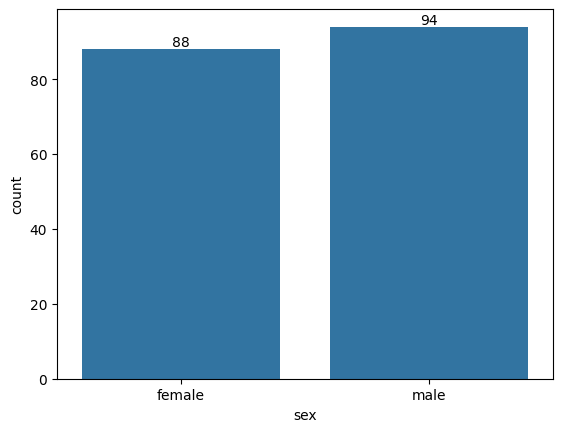

In [25]:
# quantidade de passageiros por sexo

# ax = sns.barplot(df['sex'].value_counts(), color='lightblue')
ax = sns.countplot(data=df, x='sex')
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

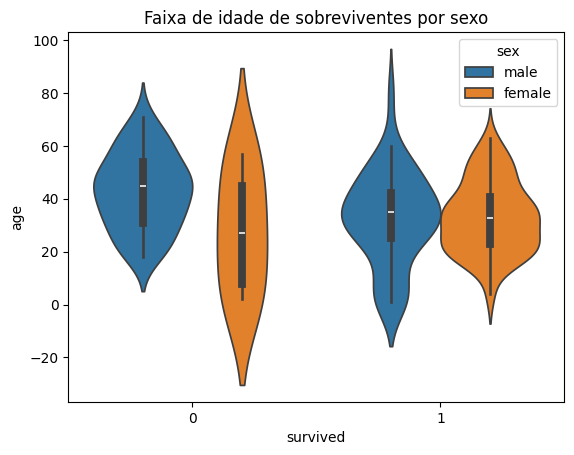

In [27]:
ax = sns.violinplot(x='survived', y='age', hue='sex', data= df)
plt.title('Faixa de idade de sobreviventes por sexo')
plt.show()

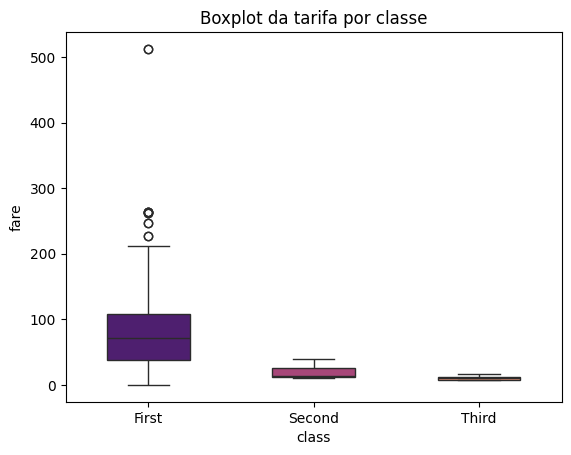

In [ ]:
ax = sns.boxplot(x='class', y='fare',data=df, width=0.5, hue='class', palette='magma')
plt.title('Boxplot da tarifa por classe')
plt.show()

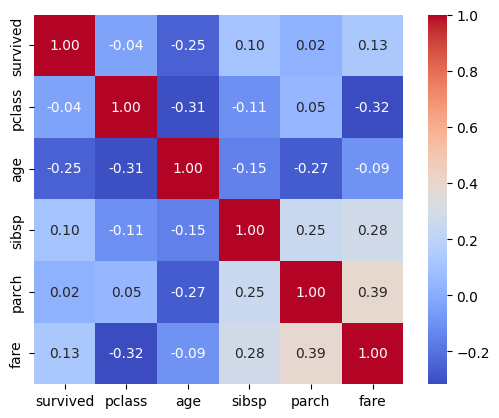

In [33]:
ax = sns.heatmap(data=df[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']].corr(),
                annot=True,
                fmt=".2f",
                cmap="coolwarm",
                square=True)
plt.show()

/tmp/ipykernel_10738/278802008.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = sns.barplot(x='class', y='survived', hue='sex', data=df.groupby(['class', 'sex']).agg({'survived': 'sum'}), palette='Reds')


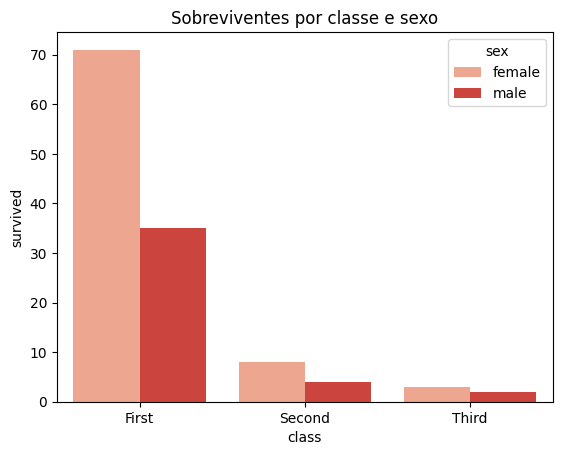

In [ ]:
ax = sns.barplot(x='class', y='survived', hue='sex', data=df.groupby(['class', 'sex']).agg({'survived': 'sum'}), palette='Reds')
plt.title('Sobreviventes por classe e sexo')
plt.show()